# Analiza vin
# Projektna naloga za Programiranje 1


Vsi podatki v analizi so zajeti iz [winelibrary](https://winelibrary.com/search?color[]=Red&color[]=White&color[]=Rose&page=1&size[]=750ML). Seveda notri niso vsebovana vsa vina iz celega sveta, zato so lahko nekateri podatki precej pomankljivi ( morda vina nekatere države sploh niso vsebovana ali pa so vsebovana le poceni/draga vina in so zato povprečja nekoliko napačna).

## Predpriprava

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

vina = pd.read_csv('obdelani-podatki/vina.csv', index_col='id')
okusi = pd.read_csv('obdelani-podatki/okusi.csv')
vonji = pd.read_csv('obdelani-podatki/vonji.csv')

pd.options.display.max_rows = 20

#pandas spreminja tipe objektov, mi pa vseeno želimo, da bojo letniki tipa int, nepodani letniki pa bodo označeni z 0
vina['letnik'] = vina['letnik'].fillna(0).astype('int')

vina

,ime,barva,letnik,drzava,regija,cena,alkohol,zaprtje,ocena
id,,,,,,,,,
100056,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,2015,France,Burgundy,45.99,13.0,Cork,NaN
100087,2016 Grey&#39;s Peak Sauvignon Blanc,White,2016,New Zealand,South Island,24.98,13.5,Screwtop,NaN
100112,2013 The Vineyardist &#39;lazy Susan Ranch&#3...,Red,2013,United States,California,149.99,14.9,Cork,95.0
100202,2014 Vine Hill Ranch Cabernet Sauvignon,Red,2014,United States,California,184.99,14.5,Cork,NaN
100224,2012 Giovanni Manzone Barolo Gramolere,Red,2012,Italy,Piedmont,69.99,14.0,Cork,95.0
100259,2010 Chateau Tourteran,Red,2010,France,Bordeaux,19.99,13.5,Cork,90.0
100298,2016 Redheads Studio Yard Dog Red,Red,2016,Australia,South Australia,9.95,14.5,Screwtop,NaN
100376,2016 Crosby Rose,Rose,2016,United States,California,5.99,13.0,Screwtop,NaN
100414,2014 Melville Pinot Noir Estate,Red,2014,United States,California,29.99,14.0,Cork,90.0


## Najdražja in najcenejša vina

Najprej si za pregled oglejmo nekaj najdražjih in nekaj najcenejših vin.

In [104]:
#najdražjih 5 vin
vina.sort_values('cena', ascending = False).head(5)

,ime,barva,letnik,drzava,regija,cena,alkohol,zaprtje,ocena
id,,,,,,,,,
86847,2013 Premiere Napa Valley Fairchild Cabernet ...,Red,2013,United States,California,1999.99,14.5,Cork,NaN
109243,2015 Screaming Eagle The Flight,Red,2015,United States,California,899.99,14.0,Cork,97.0
79949,2012 Premiere Napa Valley Bevan &amp; Boswell...,Red,2012,United States,California,849.99,15.4,Cork,NaN
79942,2012 Premiere Napa Valley Larkmead 2012 Calis...,Red,2012,United States,California,799.99,14.5,Cork,NaN
106219,2015 Bryant Family Vineyard Cabernet Sauvignon,Red,2015,United States,California,699.99,14.5,Cork,99.0


Iz tabele vidimo, da je vseh pet najdražjih vin rdečih iz United States, natančneje iz Californije.
Vsa so zaprta z plutnim zamaškom in vsaj nekoliko starana. Najdražje vino stane 1999,99€. 

In [105]:
#najcenejših 5 vin
vina.sort_values('cena').head(5)

,ime,barva,letnik,drzava,regija,cena,alkohol,zaprtje,ocena
id,,,,,,,,,
67740,Manischewitz Cream Red Concord (U),Red,0,United States,New York,3.99,11.0,Screwtop,NaN
21160,Manischewitz Concord (U)P,Red,0,United States,New York,3.99,11.0,Screwtop,NaN
108993,2016 Avia Cabernet Sauvignon,Red,2016,Slovenia,NaN,4.68,12.5,Screwtop,NaN
19530,G &amp; D Marsala,White,0,Italy,Sicily,4.79,16.0,Screwtop,NaN
108923,2017 Ponte Da Barca Vinho Verde Este,White,2017,Portugal,NaN,4.88,11.5,Screwtop,NaN


Vseh pet najcenejših vin je zaprtih vijačno, kar ne preseneča, saj je ta način zaprtja precej ugodnejši za proizvajalca, vino pa ima krajšo obstojnost. V nadaljevanju bomo preverili, ali to velja tudi v povpračju, torej ali so vina zaprta vijačno v splošnem cenejša od tistih s plutnim zamaškom.

Zanimivo je, da tako najcenejše kot tudi najdražje vino prihaja iz United States ter tudi to, da tri izmed petih nimajo podanega letnika, kar nakazuje, da so cenejša vina lahko mešanica več različnih letnikov.

Poglejmo si povprečje cen vin v posameznih državah. Pričakujemo, da bodo najdražja v najbol vinorodnih deželah (Francija, Amerika, Anglija).


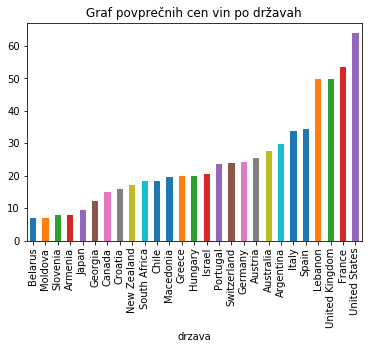

In [106]:
vina_po_drzavah = vina.groupby('drzava')
povprecja_cen_po_drzavah = vina_po_drzavah['cena'].mean().round(2)
povprecja_cen_po_drzavah[povprecja_cen_po_drzavah.index].sort_values().plot(kind = 'bar', title = 'Graf povprečnih cen vin po državah')

Iz grafa je razvidno, da je poleg pričakovanih držav v samem vrhu tudi Lebanon.

## Katera barva vina je v povprečju najdražja?

Splošno znano so rdeča vina precej dražja, saj so v večini narejena za staranje, so zahtevnejša za pridelavo in ob koncu bogatejša.
Poleg tega domnavam, da bodo roseji zaradi načina pridelave najcenejši, še vedno pa precej blizu belih vin.
Preverimo naše domneve iz zbranih podatkov.

In [107]:
#povprečje cen vin po barvah
vina_po_barvah = vina.groupby('barva')
povprecja_po_barvah = vina_po_barvah.cena.mean().round(2)
povprecja_po_barvah

barva
Red      57.14
Rose     20.66
White    29.52
Name: cena, dtype: float64

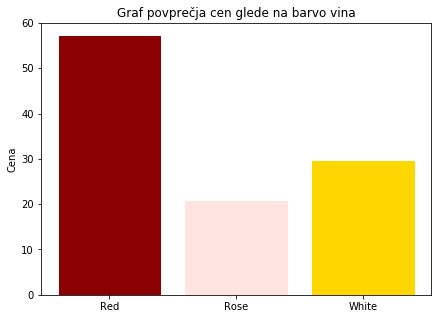

In [108]:
plt.figure(figsize = (7,5))
ax = plt.gca()
ax.set(ylabel = 'Cena', title = 'Graf povprečja cen glede na barvo vina')
graf = plt.bar(povprecja_po_barvah.index, povprecja_po_barvah)
graf[0].set_color('darkred')
graf[1].set_color('mistyrose')
graf[2].set_color('gold')


Graf očitno potrdi domnevo. Preseneča pa, da so roseji kar precej cenejši od belih vin.

## Katere vino ima najvišjo vsebovanost alkohola?

Poglejmo si, katero vino ima najvišjo vsebovanost alkohola.
Domnevam, da bo to vino rdeče.

In [109]:
vina[vina.alkohol == vina.alkohol.max()]

,ime,barva,letnik,drzava,regija,cena,alkohol,zaprtje,ocena
id,,,,,,,,,
109331,2016 Fonseca Vintage Port,Red,2016,Portugal,Port,89.99,20.5,Cork,98.0


Res je vino z najvišjo vsebovanostjo alkohola rdeče. Zanimivo se mi zdi, da je to vino iz Portugalske. 
Poglejmo si, ali ima tudi v povprečju Portugalska vina z največjo vsebovanostjo alkohola.

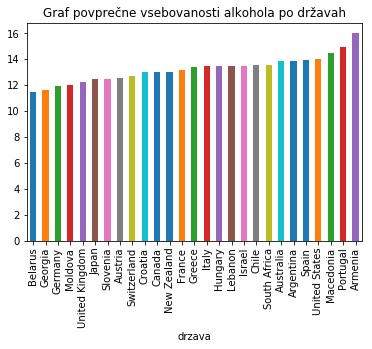

In [110]:
povprecja_alkohola_po_drzavah = vina_po_drzavah['alkohol'].mean().round(2)
povprecja_alkohola_po_drzavah[povprecja_alkohola_po_drzavah.index].sort_values().plot(
    kind = 'bar', 
    title = 'Graf povprečne vsebovanosti alkohola po državah')

Izgleda, da je povprečna vsbovanost alkohola precej enaka po vseh državah. Največjo vsebovanost alkohola ima Armenia, najmanjšo pa Belorusija.

## Ali je vsebovanost alkohola povezana s ceno?

Poglejmo si, ali je vsebovanost alkohola sploh kako povezana s ceno.

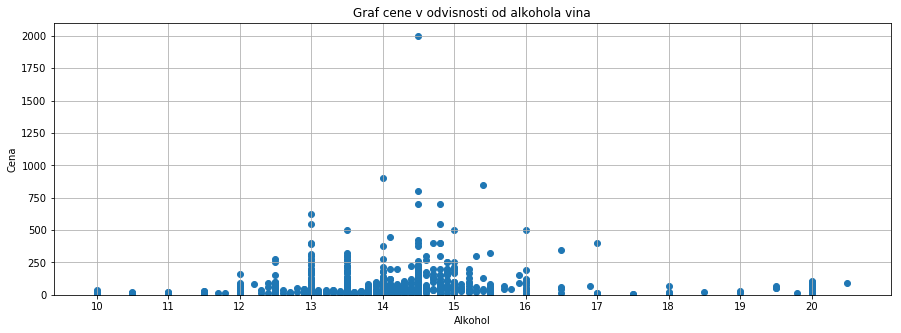

In [113]:
plt.figure(figsize = (15,5))
plt.ylim(0,vina['cena'].max() + 100)
ax = plt.gca()
ax.grid()
ax.set(xlabel = 'Alkohol', ylabel = 'Cena', title = 'Graf cene v odvisnosti od alkohola vina')
plt.xticks(np.arange(vina.alkohol.min(), vina.alkohol.max(), step = 1))
plt.scatter(vina.alkohol, vina.cena)


Na grafu opazimo, da ima največ vin okrog 13%-15% alkohola, kjer se nahajajo tudi najdražja vina. Torej so najdražja vina v okolici standardnih vrednosti alkohola (morda nekoliko nad standardom), v obeh ekstremih pa so vina najcenejša.


## Kako sta okus in vonj povezana z barvo in zaprtjem?

Za pregled pogostosti vonjev in okusev v odvisnosti od barve ter zaprtja najprej združimo naše tabele podatkov.

In [114]:
vonji_in_okusi = pd.merge(vina[['ime','barva', 'zaprtje']], pd.merge(vonji, okusi), 
                          left_on = 'id' ,right_on = 'vino')
vonji_in_okusi

,ime,barva,zaprtje,vino,vonj,okus
0,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,barnyard,ripe cherry
1,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,barnyard,plum
2,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,barnyard,strawberry
3,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,barnyard,raspberry and mushroom
4,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,cherry,ripe cherry
5,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,cherry,plum
6,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,cherry,strawberry
7,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,cherry,raspberry and mushroom
8,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,plum,ripe cherry
9,2015 Gerard Seguin Gevrey Chambertin Terroir ...,Red,Cork,100056,plum,plum


Poglejmo si 10 najpogostejših vonjev in okusov v vinih.

In [115]:
#kateri vonji se najpogosteje pojavljajo v vinih
najpogostejši_vonji = vonji_in_okusi.groupby('vonj').count().sort_values('vino').tail(10)
najpogostejši_vonji['vino']

vonj
  tobacco       4090
  kiwi          4117
  rose          4126
  violet        4197
  pear          4199
currant         4333
  cedar         4566
  earth         5709
  blackberry    6176
  cherry        8242
Name: vino, dtype: int64

In [116]:
#kateri okusi se najpogosteje pojavljajo v vinih
najpogostejši_okusi =  vonji_in_okusi.groupby('okus').count().sort_values('vino').tail(10)
najpogostejši_okusi['vino']

okus
  vanilla        4164
  olive          4202
  lime           4204
  oak            4339
  bell pepper    4352
  pear           4473
  spice          4497
  cherry         5167
  plum           6232
  blackberry     6238
Name: vino, dtype: int64

Kaj pa najpogostejši okusi in vonji v posameznih barvah vin ali pa pri različnih zaprtjih vin?

In [120]:
#pet najpogostejših vonjev na barvo vina
vonji_po_barvah = {}
for color in ['Red','White', 'Rose']:
    vonji_po_barvah[color] = vonji_in_okusi[vonji_in_okusi.barva == color].groupby('vonj').size().sort_values().tail(5)
vonji_po_barvah 

{'Red': vonj
   cedar         4331
 currant         4333
   earth         5552
   blackberry    6116
   cherry        7295
 dtype: int64, 'White': vonj
 apple        3429
   apricot    3530
   lemon      3533
   kiwi       3840
   pear       3911
 dtype: int64, 'Rose': vonj
   cherry        361
   plum          365
   smoke         373
   tobacco       392
   dark fruit    393
 dtype: int64}

In [119]:
#pet najpogostejših okusov na barvo vina
okusi_po_barvah = {}
for color in ['Red','White', 'Rose']:
    okusi_po_barvah[color] = vonji_in_okusi[vonji_in_okusi.barva == color].groupby('okus').size().sort_values().tail(5)
okusi_po_barvah 

{'Red': okus
   olive          4124
   bell pepper    4124
   cherry         4942
   plum           5236
   blackberry     5620
 dtype: int64, 'White': okus
   apricot    3461
   lemon      3739
   peach      3762
   lime       3897
   pear       4159
 dtype: int64, 'Rose': okus
   leather       373
   plum          395
   vanilla       480
   blackberry    568
   strawberry    590
 dtype: int64}

In [121]:
#pet najpogostejših vonjev na način zaprtja
vonji_po_zaprtju = {}
for zaprtje in ['Cork','Screwtop']:
    vonji_po_zaprtju[zaprtje] = vonji_in_okusi[vonji_in_okusi.zaprtje == zaprtje].groupby('vonj').size().sort_values().tail(5)
vonji_po_zaprtju

{'Cork': vonj
 currant         4040
   cedar         4212
   earth         5424
   blackberry    5716
   cherry        7675
 dtype: int64, 'Screwtop': vonj
   peach      539
   apricot    584
 apple        706
   kiwi       774
   pear       785
 dtype: int64}

In [122]:
#pet najpogostejših okusov na način zaprtja
okusi_po_zaprtju = {}
for zaprtje in ['Cork','Screwtop']:
    okusi_po_zaprtju[zaprtje] = vonji_in_okusi[vonji_in_okusi.zaprtje == zaprtje].groupby('okus').size().sort_values().tail(5)
okusi_po_zaprtju

{'Cork': okus
   oak           4035
   spice         4178
   cherry        4814
   blackberry    5741
   plum          5829
 dtype: int64, 'Screwtop': okus
 apple      581
   lemon    581
   peach    676
   lime     732
   pear     793
 dtype: int64}

Okusi in vonji vin zaprtih z zavitjem so nekoliko bolj sveži in kiselkasti, kar nakazuje, da so to mlada bela vina, za katere se v resnici tudi uporablja tako zaprtje.

## Ali so letniki vin povezani s ceno vina? 

Domnevamo, da bodo starejša rdeča vina dražja, saj se z njihovim staranjem njihova vrednost zvišuje. 
Pričakujem tudi nekaj odstopanj, saj niso vsa vina narejena za staranje in se jim tako lahko vrednost ne zvišuje.

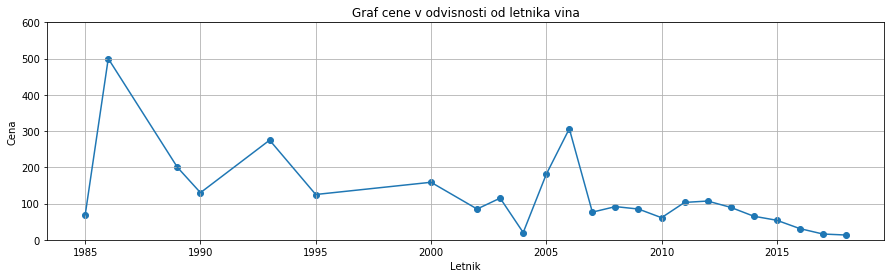

In [124]:
#povprečja cen po letnikih vina
#ker so neznani letniki označeni z 0, jih moramo odstraniti iz analize
vina_s_pravimi_letniki = vina[vina.letnik > 0]
vina_po_letih = vina_s_pravimi_letniki.groupby('letnik')
povprecja_po_letih = vina_po_letih['cena'].mean().round(2)

plt.figure(figsize = (15,4))
plt.ylim(0,povprecja_po_letih.max() +100)
ax = plt.gca()
ax.grid()
ax.set(xlabel = 'Letnik', ylabel = 'Cena', title = 'Graf cene v odvisnosti od letnika vina')
plt.scatter(povprecja_po_letih.index, povprecja_po_letih)
plt.plot(povprecja_po_letih.index, povprecja_po_letih)

Za nekoliko lepšo predstavo je graf povezan s črto. V splošnem z izjemo odstopanj graf z starejšimi letniki res narašča, kar je še posebaj očitno zadnjih 10 let, saj imamo tu tudi veliko več podatkov. Opazimo tudi nekaj velikih odstopanj, kjer je preprosto lahko šlo za slab oziroma dober letnik.

## Ali je cena povezana z oceno vina?

V splošnem naj bi seveda bila cena povezana z oceno vina. Vendar menim, da to ne bo popolnoma res. Iz vsakdana vem, da so lahko nekatera veliko dražja vina podobna ali slabša nekaterim cenejšim. Cena je napreč odvisna tudi od proizvedene količine in morda od posebnih dogodkov pripetenih določeni steklenici.

[Text(0, 0.5, 'Cena'),
 Text(0.5, 0, 'Ocena'),
 Text(0.5, 1.0, 'Graf ocene v odvisnosti od cene vina')]

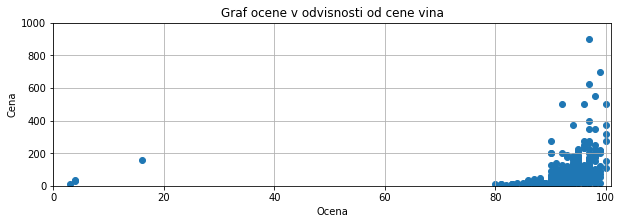

In [125]:
plt.figure(figsize = (10,3))
plt.scatter(vina.ocena, vina.cena )
plt.ylim(0,vina_z_oceno.cena.max() + 100)
plt.xlim(0,101)
ax = plt.gca()
ax.grid()
ax.set(xlabel = 'Ocena', ylabel = 'Cena', title = 'Graf ocene v odvisnosti od cene vina')

Kot pričakovano je veliko odstopanj pri najdražjih vinih, vseeno pa zgoščenina (z izpuščenimi odstopanji) nakazuje eksponentno naraščanje cene z oceno.


Nekoliko preseneča nekaj vin z zelo nizko oceno. Poglejmo si ta vina.

In [126]:
vina.sort_values('ocena').head(5)

,ime,barva,letnik,drzava,regija,cena,alkohol,zaprtje,ocena
id,,,,,,,,,
91896,2014 Rapa Nui Pinot Noir Reserve,Red,2014,Chile,Southern Region,9.99,13.5,Cork,3.0
108073,2015 Fisher Unity Chardonnay,White,2015,United States,California,29.96,14.0,Cork,4.0
108077,2013 Fisher Unity Pinot Noir,Red,2013,United States,Anderson Valley California,33.98,14.5,Cork,4.0
109486,2010 Domaine Coudray Bizot Vosne Romanee La C...,Red,2010,France,Burgundy,159.99,13.0,Cork,16.0
17470,Martini &amp; Rossi Asti Spumanti,White,0,Italy,Piedmont,11.09,NaN,Cork,80.0


Glede na ceno teh vin, menim, da so ta bila ocenjena po drugačni lestvici, zato jih izpustimo in si oglejmo podrobnejši graf v okolici ocen 80-100.

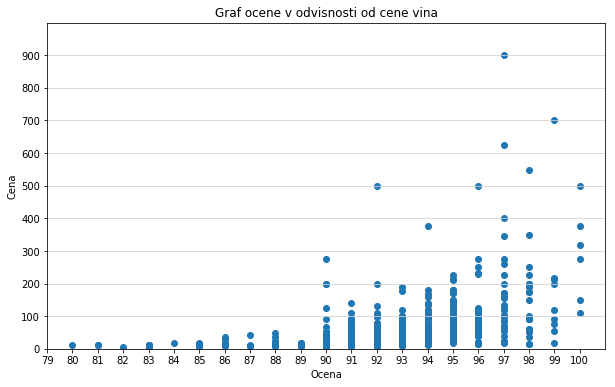

In [127]:
vina_z_oceno = vina[vina.ocena.notnull()]

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.grid(axis = 'y', color = 'lightgray')
ax.set(xlabel = 'Ocena', ylabel = 'Cena', title = 'Graf ocene v odvisnosti od cene vina')
plt.xlim(79,101)
plt.ylim(0,vina_z_oceno.cena.max() + 100)
plt.xticks(np.arange(79, 101, step = 1))
plt.yticks(np.arange(0, vina_z_oceno.cena.max() + 100, step = 100))
plt.scatter(vina.ocena, vina.cena )

Opazimo, da morda vseeno narašča nekoliko počasneje kot eksponentna funkcija, vseeno pa hitreje kot linearna.

## Ali je cena povezana z zaprtjem vina?

Kot smo že pri pregledu na začetku opazili, da imajo najdražja vina plutni zamašek in najcenejša vijačni, domnevam, da bo enako veljalo tudi v povprečju.

In [128]:
#povprečna cena na zaprtje
vina_po_zaprtju = vina.groupby('zaprtje', as_index=True)
povprecja_po_zaprtju = vina_po_zaprtju['cena'].mean().round(2)
povprecja_po_zaprtju

zaprtje
Cork        51.59
Screwtop    15.08
Name: cena, dtype: float64

Text(0, 0.5, 'Zaprtje')

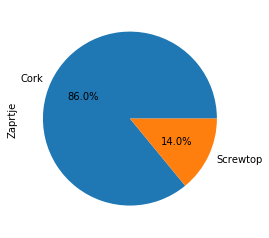

In [129]:
#koliko sploh imamo vin z nekim zaprtjem
vina_po_zaprtju.size().plot( kind = 'pie', y = None, autopct='%1.1f%%')
ax = plt.gca()
ax.set_ylabel('Zaprtje')

Iz tortnega diagrama vidimo, da je 86% vin zaprtih s plutnim zamaškom in le 14% z zavitjem.

([], <a list of 0 Text xticklabel objects>)

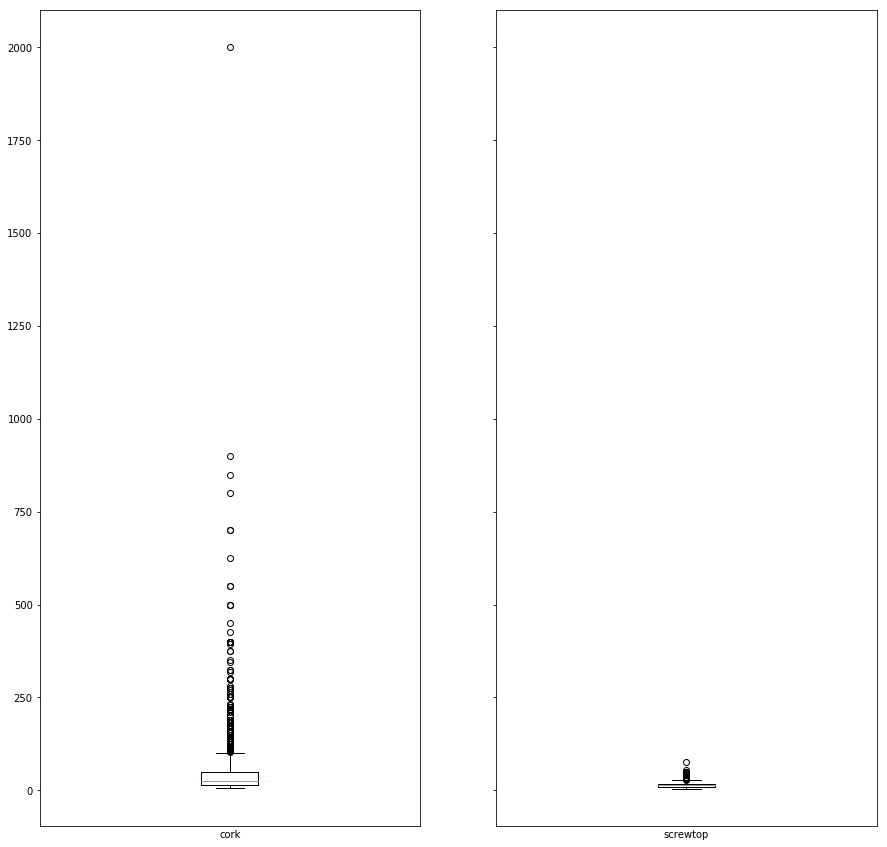

In [130]:
#cene glede na zaprtje
vina_z_zaprtjem = vina[vina.zaprtje.notnull()]
vina_z_cork = vina_z_zaprtjem[vina_z_zaprtjem.zaprtje == 'Cork']
vina_s_screwtop = vina_z_zaprtjem[vina_z_zaprtjem.zaprtje == 'Screwtop']


fig, axs = plt.subplots(nrows=1, ncols=2, sharex = True, sharey = True ,figsize=(15,15))
axs[0].boxplot(vina_z_cork['cena'])
axs[0].set_xlabel('cork')
axs[1].boxplot(vina_s_screwtop['cena'])
axs[1].set_xlabel('screwtop')
plt.xticks([])

Hitro opazimo, da so cene pri plutnem zaprtju veliko večje. Poglejmo si še grafa v svojih razmerjih.

([], <a list of 0 Text xticklabel objects>)

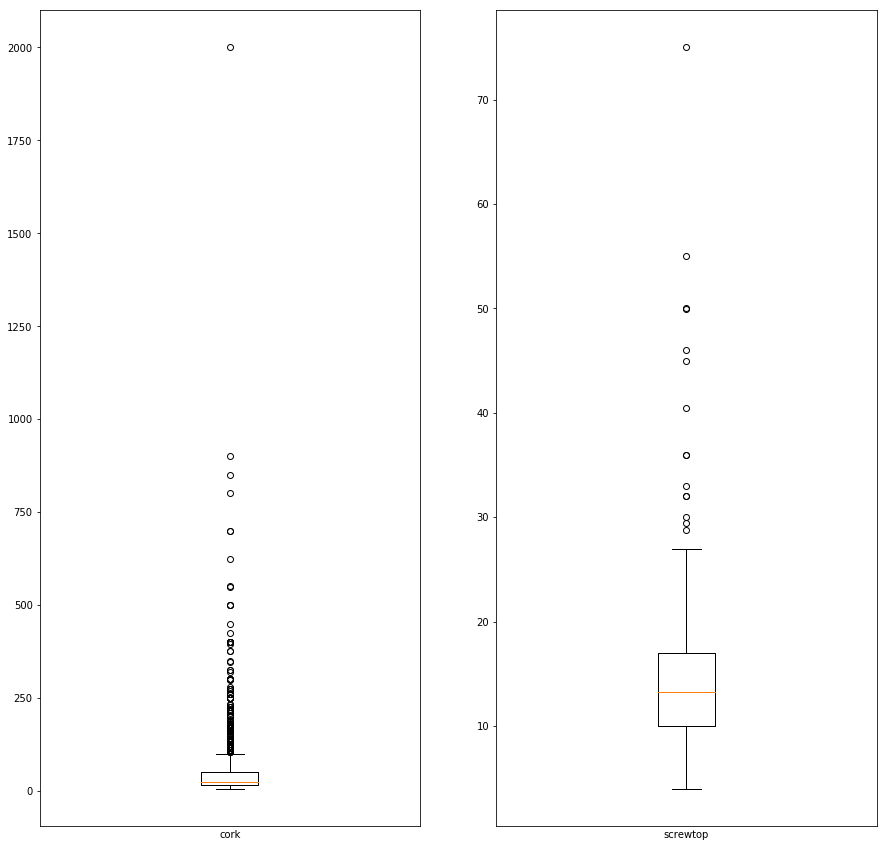

In [131]:
#graf cen glede na zaprtje vsak z svojo skalno lestvico
fig, axs = plt.subplots(nrows=1, ncols=2, sharex = True ,figsize=(15,15))
axs[0].boxplot(vina_z_cork['cena'])
axs[0].set_xlabel('cork')
axs[1].boxplot(vina_s_screwtop['cena'])
axs[1].set_xlabel('screwtop')
plt.xticks([])